# CSC478 - Assignment 2: Part 1
### K-Nearest-Neighbor (KNN) classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os

In [3]:
os.getcwd()

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW2'

In [4]:
cd '/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW2/newsgroups'

/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW2/newsgroups


## 1. K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]
### For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.

In [5]:
#Loading data

train_data = pd.read_table('trainMatrixModified.txt',header=None)

In [6]:
train_data.shape

(5500, 800)

In [7]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
test_data = pd.read_table('testMatrixModified.txt',header=None)

In [9]:
test_data.shape

(5500, 200)

In [10]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
terms= pd.read_table('modifiedTerms.txt',header=None)

In [12]:
terms.shape

(5500, 1)

In [13]:
terms.head()

,0
0,david
1,rex
2,wood
3,subject
4,call


In [14]:
train_class= pd.read_table('trainClasses.txt',usecols=[1],header=None)

In [15]:
train_class.shape

(800, 1)

In [16]:
train_class.head()

,1
0,0
1,1
2,0
3,1
4,0


In [17]:
test_class = pd.read_table('testClasses.txt',usecols=[1],header=None)

In [18]:
test_class.shape

(200, 1)

In [19]:
test_class.head()

,1
0,1
1,0
2,0
3,1
4,1


In [20]:
#converting from TD to DT matrix
DT_train = train_data.T
DT_test = test_data.T

In [21]:
DT_train.shape

(800, 5500)

In [22]:
DT_train.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
DT_test.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
terms= np.genfromtxt('modifiedTerms.txt',dtype=str)
print(terms[0:10])

['david' 'rex' 'wood' 'subject' 'call' 'librari' 'creat' 'widget' 'multipl'
 'time']


In [25]:
termFreqs = train_data.sum(axis=1)
print(termFreqs[0:10])
len(termFreqs)

0    102.0
1     11.0
2     22.0
3    959.0
4    222.0
5     84.0
6    108.0
7    262.0
8     55.0
9    318.0
dtype: float64


5500

In [26]:
dictTF = {}
for i in range(len(termFreqs)):
    dictTF[terms[i]] = termFreqs[i]
print(sorted(dictTF.items()))
sorteddictTF = sorted(dictTF.values(), reverse=True)

[('00', 102.0), ('000', 34.0), ('01', 30.0), ('02', 28.0), ('0223', 7.0), ('0228', 2.0), ('03', 29.0), ('04', 26.0), ('0444', 5.0), ('05', 18.0), ('06', 23.0), ('07', 23.0), ('08', 14.0), ('09', 14.0), ('0ha', 3.0), ('0xff', 2.0), ('10', 249.0), ('100', 52.0), ('1000', 10.0), ('10000', 3.0), ('1006', 5.0), ('1008', 7.0), ('101', 18.0), ('1010', 3.0), ('1017', 5.0), ('1018', 3.0), ('1019', 2.0), ('102', 15.0), ('1020', 8.0), ('1021', 3.0), ('1024', 3.0), ('103', 16.0), ('1033', 5.0), ('1038', 4.0), ('104', 22.0), ('1040', 4.0), ('1043', 2.0), ('1046', 5.0), ('1049', 4.0), ('105', 14.0), ('10510', 3.0), ('1053', 4.0), ('1054', 5.0), ('1057', 3.0), ('106', 12.0), ('1062', 3.0), ('1063', 3.0), ('1067', 3.0), ('107', 8.0), ('1071', 4.0), ('1072', 3.0), ('1076', 4.0), ('108', 12.0), ('1082', 5.0), ('109', 8.0), ('1096', 3.0), ('10th', 3.0), ('10x20', 3.0), ('11', 178.0), ('110', 23.0), ('1109', 3.0), ('111', 21.0), ('11150', 4.0), ('112', 17.0), ('1120', 3.0), ('1121', 5.0), ('1126', 3.0), (

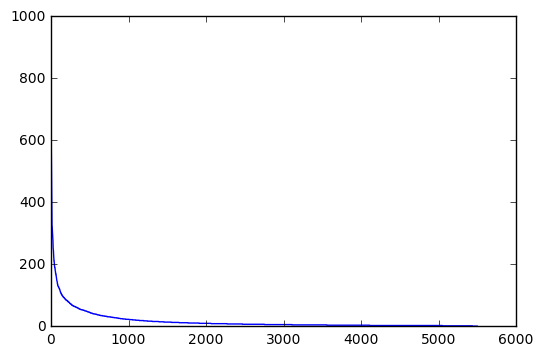

In [27]:
plt.plot(sorteddictTF)
plt.show()

## a) Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples). You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [28]:
DT_train = np.array(DT_train)
DT_test = np.array(DT_test)
train_labels = np.array(train_class)
test_labels = np.array(test_class)
DT_train.shape

(800, 5500)

In [29]:
def knn_search(x, D, L, K, measure):
    """ find K nearest neighbours of data point x among D """
    if measure == 0:
        # euclidean distances from the other points
        inX = x
        diffMat = np.tile(inX, (D.shape[0],1)) - D
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        dists = sqDistances**0.5
    elif measure == 1:
        #cosine similarity
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    #print(dists)
    idx = np.argsort(dists) # sorting
    #print(idx[:K])
    # return the indexes of K nearest neighbours
    neigh_labels = L[idx[:K]]
    class0 = 0
    class1 = 0
    for index in neigh_labels:
        #print(L[index])
        if L[index] == 0:
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        if class0 >= class1:
            predicted_class = 0
        else:
            predicted_class = 1
    #print("The " + str(K) + " Nearest Neighbours are:" + str(idx[:K]))
    #print("The predicted class is: " + str(predicted_class))
    return idx[:K], predicted_class

Not Printing the Predicted class and neighbors directly as the question asks to return values. 

Trying a few vectors from the test data and the results are below- 

In [31]:
neigh_index, predicted_class = knn_search(DT_test[0], DT_train, train_labels, 5, 1)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[685 628 667 152 427]
The predicted class is: 1


In [32]:
neigh_index, predicted_class = knn_search(DT_test[0], DT_train, train_labels, 5, 0)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[685 628 703 266 510]
The predicted class is: 1


In [34]:
neigh_index, predicted_class = knn_search(DT_test[1], DT_train, train_labels, 9, 1)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[382 775 163 587 550 127 485 651 767]
The predicted class is: 0


In [35]:
neigh_index, predicted_class = knn_search(DT_test[1], DT_train, train_labels, 9, 0)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[798 554 757 224  38 119 711 398 608]
The predicted class is: 0


In [37]:
neigh_index, predicted_class = knn_search(DT_test[99], DT_train, train_labels, 5, 1)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[255 405 556 744 170]
The predicted class is: 1


In [38]:
neigh_index, predicted_class = knn_search(DT_test[99], DT_train, train_labels, 5, 0)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[744 405 556 170  49]
The predicted class is: 1


In [39]:
neigh_index, predicted_class = knn_search(DT_test[199], DT_train, train_labels, 15, 1)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[322 664  14 145 440 792 232 254 546  52   5 246 203 618  73]
The predicted class is: 1


In [40]:
neigh_index, predicted_class = knn_search(DT_test[199], DT_train, train_labels, 15, 0)
print("The Nearest Neighbours are:" + str(neigh_index))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[798 757 224  38 119 711 398  69 751 342  53 644 706 551 464]
The predicted class is: 0


So looking at the results above, For the last case we can see different predictions for Euclidean and Cosine distance/similarity measures. If we look at the test labels here Cosine similarity (measure=1) results into correct prediction for that particular test vector.

## b) Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.

In [41]:
def accuracy(x, D, train_L, test_L, K, measure):
    count = 0
    correct = 0
    for i in range(x.shape[0]):
        #Use the i rows of the testing data, one-by-one, in the knn function
        count += 1
        neigh_idx, predicted_class = knn_search(x[i,:], D, train_L, K, measure)
        #If the two classes match, add 1 to the correct count
        if (predicted_class == test_L[i]):
            correct += 1
    accuracypercent = (correct/count)*100
    print("Accuracy with " + str(K) + " neighbors is: " + str(accuracypercent) + "%")
    return accuracypercent

In [42]:
accuracypercent = accuracy(DT_test, DT_train, train_labels, test_labels, 5, 0) #Euclidean

Accuracy with 5 neighbors is: 81.5%


In [43]:
accuracypercent = accuracy(DT_test, DT_train, train_labels, test_labels, 5, 1) #Cosine similarity

Accuracy with 5 neighbors is: 97.0%


## c) Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [44]:
import matplotlib.pyplot as pyplot
def plot_accuracy(x, D, train_L, test_L):
    accEuc = {}
    accCos = {}
    for i in range(20):
        i += 1
        #print(i)
        accEuc[i] = accuracy(x, D, train_L, test_L, i, 0)
        #print(accEuc)
        accCos[i] = accuracy(x, D, train_L, test_L, i, 1)
        #print(accCos)
    df_toPlotEuc = pd.DataFrame(list(accEuc.items()))
    df_toPlotCos = pd.DataFrame(list(accCos.items()))
    plt.plot( df_toPlotCos[0], df_toPlotCos[1], 'bs-', label="Cosine")
    plt.plot( df_toPlotEuc[0], df_toPlotEuc[1], 'r^--', label="Eucliudean")
    plt.xlabel("Number of Neighbours")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Comparison For k-Nearest Neighbours")
    plt.legend(loc="best")
    plt.show()
    return accEuc, accCos

Accuracy with 1 neighbors is: 78.0%
Accuracy with 1 neighbors is: 98.5%
Accuracy with 2 neighbors is: 78.5%
Accuracy with 2 neighbors is: 96.0%
Accuracy with 3 neighbors is: 81.0%
Accuracy with 3 neighbors is: 97.0%
Accuracy with 4 neighbors is: 77.0%
Accuracy with 4 neighbors is: 96.5%
Accuracy with 5 neighbors is: 81.5%
Accuracy with 5 neighbors is: 97.0%
Accuracy with 6 neighbors is: 74.5%
Accuracy with 6 neighbors is: 98.0%
Accuracy with 7 neighbors is: 76.5%
Accuracy with 7 neighbors is: 98.0%
Accuracy with 8 neighbors is: 73.0%
Accuracy with 8 neighbors is: 97.0%
Accuracy with 9 neighbors is: 75.0%
Accuracy with 9 neighbors is: 97.5%
Accuracy with 10 neighbors is: 70.5%
Accuracy with 10 neighbors is: 97.5%
Accuracy with 11 neighbors is: 79.5%
Accuracy with 11 neighbors is: 98.0%
Accuracy with 12 neighbors is: 72.5%
Accuracy with 12 neighbors is: 97.0%
Accuracy with 13 neighbors is: 77.5%
Accuracy with 13 neighbors is: 98.0%
Accuracy with 14 neighbors is: 74.0%
Accuracy with 14 ne

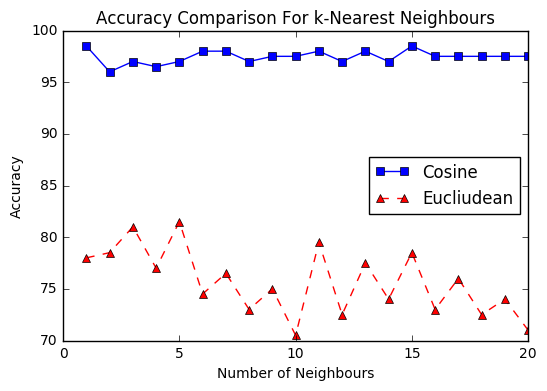

In [45]:
accEucReg, accCosReg = plot_accuracy(DT_test, DT_train, train_labels, test_labels)

So from the graph above we can see that the performance of the classifier is much better with Cosine similarity as similarity measure as compared to when we use Euclidean distance.

The maximum accuracy achieved using Cosine similarity is 98.5% which is for k = 1.

The maximum accuracy achieved using Euclidean distance is 81.5% which is for k = 5.

## d) Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [46]:
#Loading term-document data
train_data = pd.read_table('trainMatrixModified.txt',header=None)
test_data = pd.read_table('testMatrixModified.txt',header=None)

TD_train = np.array(train_data)
TD_test = np.array(test_data)

numTerms_train = len(TD_train[:,0])
NDocs_train = len(TD_train[0])
print(numTerms_train)
print(NDocs_train)

numTerms_test = len(TD_test[:,0])
NDocs_test = len(TD_test[0])
print(numTerms_test)
print(NDocs_test)

#Finding document frequencies
DF_train = np.array([(TD_train!=0).sum(1)]).T
DF_test = np.array([(TD_test!=0).sum(1)]).T

5500
800
5500
200


In [48]:
print(DF_train)

[[50]
 [ 7]
 [10]
 ..., 
 [ 2]
 [ 2]
 [ 2]]


In [49]:
print(DF_test)

[[15]
 [ 0]
 [ 1]
 ..., 
 [ 1]
 [ 1]
 [ 1]]


In [51]:
#Create a matrix with all entries = NDocs
NMatrix_train = np.ones(np.shape(TD_train), dtype=float)*NDocs_train

NMatrix_test = np.ones(np.shape(TD_test), dtype=float)*NDocs_test

In [52]:
#Converting into IDF Values

IDF_train = np.log2(np.divide(NMatrix_train, DF_train))

IDF_inter = IDF_train[:,:200] #taking 200 columns from training data to create IDF for test

In [53]:
#Computing TFxIDF values for each document-term entry based on training IDF

TF_IDF_train = TD_train*IDF_train
TF_IDF_train = np.nan_to_num(TF_IDF_train)
TF_IDF_train = TF_IDF_train.T #As classifier takes a DT matrix as input
print(TF_IDF_train)

TF_IDF_test = TD_test*IDF_inter
TF_IDF_test = np.nan_to_num(TF_IDF_test)
TF_IDF_test = TF_IDF_test.T #As classifier takes a DT matrix as input
print(TF_IDF_test)

[[  8.          13.67300254  12.64385619 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


Accuracy with 1 neighbors is: 71.0%
Accuracy with 1 neighbors is: 94.5%
Accuracy with 2 neighbors is: 74.0%
Accuracy with 2 neighbors is: 95.5%
Accuracy with 3 neighbors is: 75.0%
Accuracy with 3 neighbors is: 98.0%
Accuracy with 4 neighbors is: 79.0%
Accuracy with 4 neighbors is: 97.0%
Accuracy with 5 neighbors is: 80.0%
Accuracy with 5 neighbors is: 98.0%
Accuracy with 6 neighbors is: 71.0%
Accuracy with 6 neighbors is: 98.0%
Accuracy with 7 neighbors is: 73.0%
Accuracy with 7 neighbors is: 98.5%
Accuracy with 8 neighbors is: 66.5%
Accuracy with 8 neighbors is: 99.0%
Accuracy with 9 neighbors is: 68.0%
Accuracy with 9 neighbors is: 99.0%
Accuracy with 10 neighbors is: 62.5%
Accuracy with 10 neighbors is: 99.5%
Accuracy with 11 neighbors is: 68.0%
Accuracy with 11 neighbors is: 99.0%
Accuracy with 12 neighbors is: 63.0%
Accuracy with 12 neighbors is: 99.0%
Accuracy with 13 neighbors is: 65.0%
Accuracy with 13 neighbors is: 99.0%
Accuracy with 14 neighbors is: 60.0%
Accuracy with 14 ne

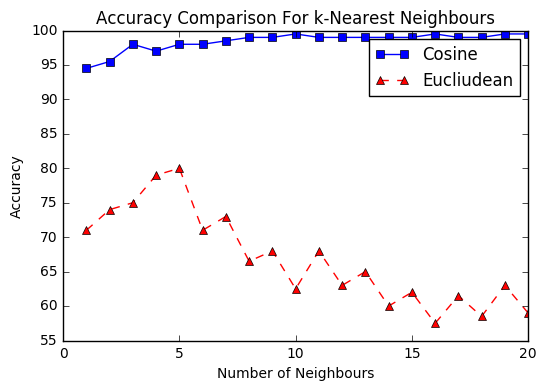

In [54]:
accEucTFIDF, accCosTFIDF = plot_accuracy(TF_IDF_test, TF_IDF_train, train_labels, test_labels)

So from the graph above we can see that the performance of the classifier is much better with Cosine similarity as similarity measure as compared to when we use Euclidean distance.

The maximum accuracy achieved using Cosine similarity is 99.5% which is for k = 10, 16, 19, 20.

The maximum accuracy achieved using Euclidean distance is 80% which is for k = 5.


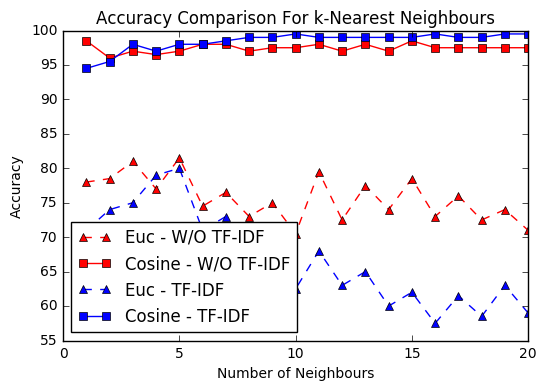

In [55]:
df_toPlotEucReg = pd.DataFrame(list(accEucReg.items()))
df_toPlotCosReg = pd.DataFrame(list(accCosReg.items()))
df_toPlotEucTF = pd.DataFrame(list(accEucTFIDF.items()))
df_toPlotCosTF = pd.DataFrame(list(accCosTFIDF.items()))
plt.plot( df_toPlotEucReg[0], df_toPlotEucReg[1], 'r^--', label="Euc - W/O TF-IDF")
plt.plot( df_toPlotCosReg[0], df_toPlotCosReg[1], 'rs-', label="Cosine - W/O TF-IDF")
plt.plot( df_toPlotEucTF[0], df_toPlotEucTF[1], 'b^--', label="Euc - TF-IDF")
plt.plot( df_toPlotCosTF[0], df_toPlotCosTF[1], 'bs-', label="Cosine - TF-IDF")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison For k-Nearest Neighbours")
plt.legend(loc="best")
plt.show()


So comparing the accuracies on the TF-IDF vector and normal term-document matrix we can see that the maximum accuracy we can get with each of the possible combinations are:

1) Without TF-IDF (Euclidean Distance): 81.5% for K=5

2) Without TF-IDF (Cosine): 98.5% for K=1

3) With TF-IDF (Euclidean Distance): 80% for K=5

4) With TF-IDF (Cosine): 99.5% for K= 10, 16, 19, 20

So we can see that we achieve highest accuracy with TF-IDF and Cosine similarity. Also we can see that when we use Euclidean distance the performance of the classifier is better for non TF-IDF vector compared to TF-IDF vector where for TF-IDF vector accuracy reaches a peak of 80% and starts to drop off after that while we get peak accuracy of 81.5% without TF-IDF vectors. With Cosine similarity we can see that the performance of the classifier is better with TF-IDF vector as compared to non TF-IDF vector where we get 99.5% accuracy for TF-IDF and 98.5% accuracy for non TF-IDF.

## e) Create a classifier based on the Rocchio Method adapted for text categorization. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.


In [56]:
def rocchio_ptype(train,train_L):
     
    ptype = np.column_stack((train,train_L))
    
    # Building the prototypes for classes 1 and 0
    class0 = np.array(np.zeros(ptype.shape[1]))
    class1 = np.array(np.zeros(ptype.shape[1]))
    #print(str(class0.shape))
    #print(str(class1.shape))
    
    for i in ptype:
        if i[-1] == 0:
            class0 += i
        else:
            class1 += i
    
    return class0, class1

In [57]:
def rocchio_sim(ptype0, ptype1, vector):
    
    # Normalizing the prototypes excluding last element (class) and vector and Caculating the cosine similarity between prototypes & the vector
    norm_class0 = np.linalg.norm(ptype0[:-1])
    norm_class1 = np.linalg.norm(ptype1[:-1])
    norm_vector = np.linalg.norm(vector)
    
    cosine_sim0 = np.dot(ptype0[:-1],vector)/(norm_class0*norm_vector)
    cosine_sim1 = np.dot(ptype1[:-1],vector)/(norm_class1*norm_vector)
    
    if cosine_sim0 >= cosine_sim1:
        predicted_class = 0
        return predicted_class, cosine_sim0, cosine_sim1
    else:
        predicted_class = 1
        return predicted_class, cosine_sim0, cosine_sim1

In [58]:
class0, class1 = rocchio_ptype(DT_train, train_labels)
predicted_class, cosine_sim0, cosine_sim1 = rocchio_sim(class0, class1, DT_test[1])
print("Similarity to Class 0 Prototype: " + str(cosine_sim0))
print("Similarity to Class 1 Prototype: " + str(cosine_sim1))
print("The predicted class is: " + str(predicted_class))

Similarity to Class 0 Prototype: 0.28727716765
Similarity to Class 1 Prototype: 0.0961131242934
The predicted class is: 0


In [59]:
class0, class1 = rocchio_ptype(DT_train, train_labels)#It's ok even we don't run this again as prototypes are not going to change
predicted_class, cosine_sim0, cosine_sim1 = rocchio_sim(class0, class1, DT_test[100])
print("Similarity to Class 0 Prototype: " + str(cosine_sim0))
print("Similarity to Class 1 Prototype: " + str(cosine_sim1))
print("The predicted class is: " + str(predicted_class))

Similarity to Class 0 Prototype: 0.0613954573453
Similarity to Class 1 Prototype: 0.2412553726
The predicted class is: 1


In [60]:
class0, class1 = rocchio_ptype(DT_train, train_labels)#It's ok even we don't run this again as prototypes are not going to change
predicted_class, cosine_sim0, cosine_sim1 = rocchio_sim(class0, class1, DT_test[199])
print("Similarity to Class 0 Prototype: " + str(cosine_sim0))
print("Similarity to Class 1 Prototype: " + str(cosine_sim1))
print("The predicted class is: " + str(predicted_class))

Similarity to Class 0 Prototype: 0.110494168666
Similarity to Class 1 Prototype: 0.195407151421
The predicted class is: 1


In [61]:
def rocchio_accu(x, D, train_L, test_L):
    
    count = 0
    correct = 0
    
    for i in range(x.shape[0]):
        count += 1
        class0, class1 = rocchio_ptype(D,train_L)
        predicted_class = rocchio_sim(class0, class1, x[i,:])
        #print(predicted_class[0])
        #print(test_L[i])
        if predicted_class[0] == test_L[i]:
            correct += 1
            
    accuracy = (correct/count)*100
    print("Accuracy with Rocchio's Method is: " + str(accuracy) + "%")

In [62]:
rocchio_accu(TF_IDF_test, TF_IDF_train, train_labels, test_labels)

Accuracy with Rocchio's Method is: 98.0%


In [63]:
rocchio_accu(DT_test, DT_train, train_labels, test_labels)

Accuracy with Rocchio's Method is: 97.5%


So for TF-IDF vector when we apply Rocchio method to it, we get 98% accuracy which is lower compared to what we get using TF-IDF vector and Cosine similarity which was 99.5%.

So vector without TF-IDF weights when we apply Rocchio method to it, we get 97.5% accuracy which is lower compared to what we get using non TF-IDF vector and Cosine similarity which was 98.5%